In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# 한글 폰트
from matplotlib import font_manager, rc

In [27]:
tourist = pd.read_csv(r'C:\Users\utw09\Desktop\정노을\AS\DATA_2023.csv', encoding='utf-8')
tourist.head()

C:\Users\utw09\AppData\Local\Temp\ipykernel_28108\799872964.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  tourist = pd.read_csv(r'C:\Users\utw09\Desktop\정노을\AS\DATA_2023.csv', encoding='utf-8')


,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6.0,4.0,4.0,5.0,1,1,2.0,3.0,4.0,4.0,...,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.10
1,7.0,20.0,4.0,5.0,1,2,2.0,9.0,7.0,NaN,...,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.33
2,8.0,2.0,2.0,5.0,1,5,NaN,NaN,NaN,NaN,...,5,1.0,1.0,4.0,2.0,1.0,5.0,2.0,1.0,244.84
3,10.0,1.0,1.0,NaN,1,3,NaN,NaN,NaN,NaN,...,4,1.0,1.0,5.0,1.0,5.0,3.0,1.0,1.0,555.27
4,11.0,3.0,3.0,5.0,1,2,8.0,3.0,7.0,NaN,...,5,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,193.43


In [28]:
# Q1 칼럼의 값을 변경
tourist['Q1'] = tourist['Q1'].replace({
    1: '여가, 위락, 휴식',
    2: '친구, 친지 방문',
    3: '사업 또는 전문 활동',
    4: '교육',
    5: '기타'
})
tourist.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6.0,4.0,4.0,5.0,1,"여가, 위락, 휴식",2.0,3.0,4.0,4.0,...,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.10
1,7.0,20.0,4.0,5.0,1,"친구, 친지 방문",2.0,9.0,7.0,NaN,...,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.33
2,8.0,2.0,2.0,5.0,1,기타,NaN,NaN,NaN,NaN,...,5,1.0,1.0,4.0,2.0,1.0,5.0,2.0,1.0,244.84
3,10.0,1.0,1.0,NaN,1,사업 또는 전문 활동,NaN,NaN,NaN,NaN,...,4,1.0,1.0,5.0,1.0,5.0,3.0,1.0,1.0,555.27
4,11.0,3.0,3.0,5.0,1,"친구, 친지 방문",8.0,3.0,7.0,NaN,...,5,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,193.43


In [11]:
# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows의 경우 "Malgun Gothic" 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

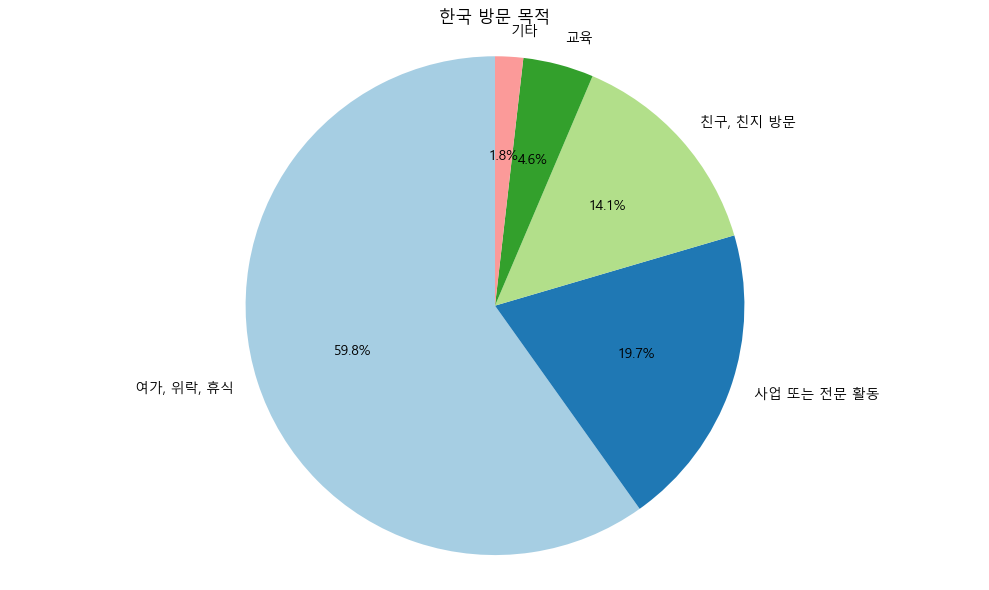

In [29]:
# 방문 목적별 빈도 계산
purpose_counts = tourist['Q1'].value_counts()

# 시각화 설정
plt.figure(figsize=(10, 6))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('한국 방문 목적')
plt.axis('equal')  # 파이차트를 원형으로 유지

plt.tight_layout()
plt.show()

In [17]:
tourist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16196 entries, 0 to 16195
Columns: 365 entries, pnid to weight
dtypes: float64(347), int64(16), object(2)
memory usage: 45.1+ MB


In [19]:
# 각 칼럼을 반복하면서 변환
for col in tourist.columns:
    tourist[col] = pd.to_numeric(tourist[col], errors='coerce')  # 변환할 수 없는 값을 NaN으로 대체
    tourist[col] = tourist[col].fillna(0)  # NaN 값을 0으로 대체
    tourist[col] = tourist[col].astype(int)  # 정수로 변환
tourist.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6,4,4,5,1,0,2,3,4,4,...,5,1,1,3,2,2,1,4,1,866
1,7,20,4,5,1,0,2,9,7,0,...,5,1,1,1,1,3,2,4,1,191
2,8,2,2,5,1,0,0,0,0,0,...,5,1,1,4,2,1,5,2,1,244
3,10,1,1,0,1,0,0,0,0,0,...,4,1,1,5,1,5,3,1,1,555
4,11,3,3,5,1,0,8,3,7,0,...,5,1,1,1,2,4,2,3,1,193


In [32]:
# 숫자와 한글 문자열의 매핑
mapping = {
    1: '식도락 관광',
    2: '쇼핑',
    3: '자연경관감상',
    4: '역사관광',
    5: '전통문화 관광',
    6: '박물관, 전시관 관람',
    7: 'K-POP 문화 관광',
    8: '공연 관람',
    9: '지역 축제 참여',
    10: '유흥',
    11: '놀이공원 및 테마파크 방문',
    12: '뷰티, 미용 관광',
    13: '치료, 건강검진',
    14: '스포츠 관람',
    15: '스포츠 참가',
    16: '기타'
}

# 각 칼럼의 숫자를 한글 문자열로 변환
tourist['Q1_1a1'] = tourist['Q1_1a1'].replace(mapping)
tourist['Q1_1a2'] = tourist['Q1_1a2'].replace(mapping)
tourist['Q1_1a3'] = tourist['Q1_1a3'].replace(mapping)
tourist.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6.0,4.0,4.0,5.0,1,"여가, 위락, 휴식",쇼핑,자연경관감상,역사관광,4.0,...,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.10
1,7.0,20.0,4.0,5.0,1,"친구, 친지 방문",쇼핑,지역 축제 참여,K-POP 문화 관광,NaN,...,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.33
2,8.0,2.0,2.0,5.0,1,기타,NaN,NaN,NaN,NaN,...,5,1.0,1.0,4.0,2.0,1.0,5.0,2.0,1.0,244.84
3,10.0,1.0,1.0,NaN,1,사업 또는 전문 활동,NaN,NaN,NaN,NaN,...,4,1.0,1.0,5.0,1.0,5.0,3.0,1.0,1.0,555.27
4,11.0,3.0,3.0,5.0,1,"친구, 친지 방문",공연 관람,자연경관감상,K-POP 문화 관광,NaN,...,5,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,193.43


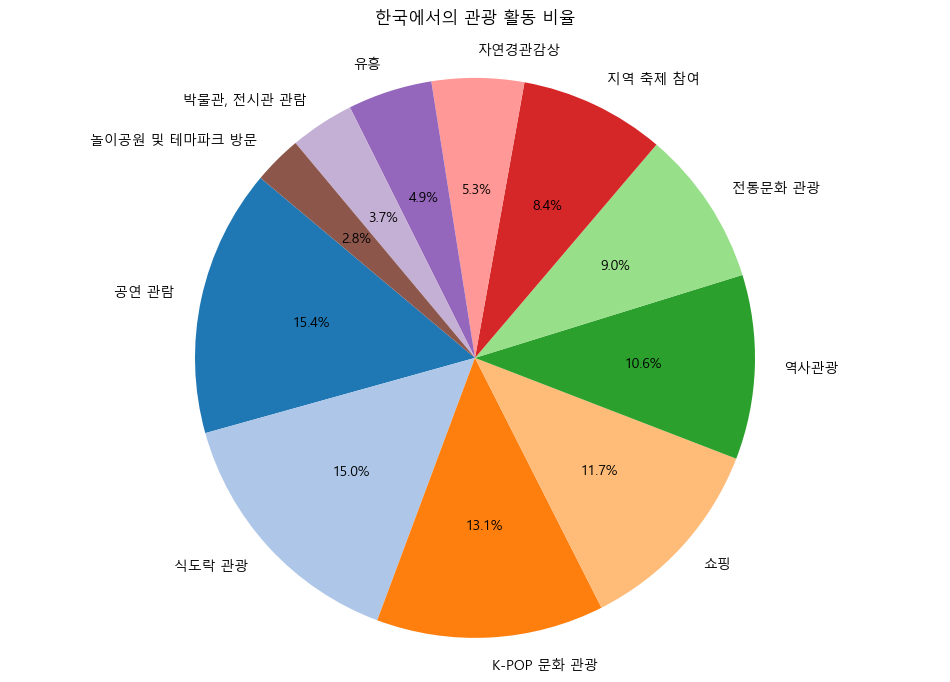

In [37]:
# 모든 데이터를 합친 후 비율 계산
all_activities = pd.concat([tourist['Q1_1a1'], tourist['Q1_1a2'], tourist['Q1_1a3']])
activity_counts = all_activities.value_counts(normalize=True) * 100  # 비율 계산

# 파이차트 그리기
plt.figure(figsize=(12, 8))
plt.pie(
    activity_counts,
    labels=activity_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.get_cmap('tab20').colors,
    labeldistance=1.1  # 레이블의 위치를 조정
)
plt.title('한국에서의 관광 활동 비율', pad=20)  # 제목과 파이차트 사이의 간격을 조정
plt.axis('equal')  # 파이차트가 원형으로 보이게 설정
plt.show()

In [39]:
# 숫자와 한글 문자열의 매핑
mapping = {
    1: '인터넷',
    2: '자국 여행사(오프라인)',
    3: '언론 매체',
    4: '친구, 동료',
    5: '관광 서적',
    6: '항공사, 호텔',
    7: '자국 한국 공공기관',
    8: '기타',
    9: '정보를 얻지 않음'}

# 각 칼럼의 숫자를 한글 문자열로 변환
tourist['Q4a1'] = tourist['Q4a1'].replace(mapping)
tourist['Q4a2'] = tourist['Q4a2'].replace(mapping)
tourist['Q4a3'] = tourist['Q4a3'].replace(mapping)
tourist['Q4a_dk'] = tourist['Q4a_dk'].replace(mapping)
tourist.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6.0,4.0,4.0,5.0,1,"여가, 위락, 휴식",쇼핑,자연경관감상,역사관광,4.0,...,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.10
1,7.0,20.0,4.0,5.0,1,"친구, 친지 방문",쇼핑,지역 축제 참여,K-POP 문화 관광,NaN,...,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.33
2,8.0,2.0,2.0,5.0,1,기타,NaN,NaN,NaN,NaN,...,5,1.0,1.0,4.0,2.0,1.0,5.0,2.0,1.0,244.84
3,10.0,1.0,1.0,NaN,1,사업 또는 전문 활동,NaN,NaN,NaN,NaN,...,4,1.0,1.0,5.0,1.0,5.0,3.0,1.0,1.0,555.27
4,11.0,3.0,3.0,5.0,1,"친구, 친지 방문",공연 관람,자연경관감상,K-POP 문화 관광,NaN,...,5,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,193.43


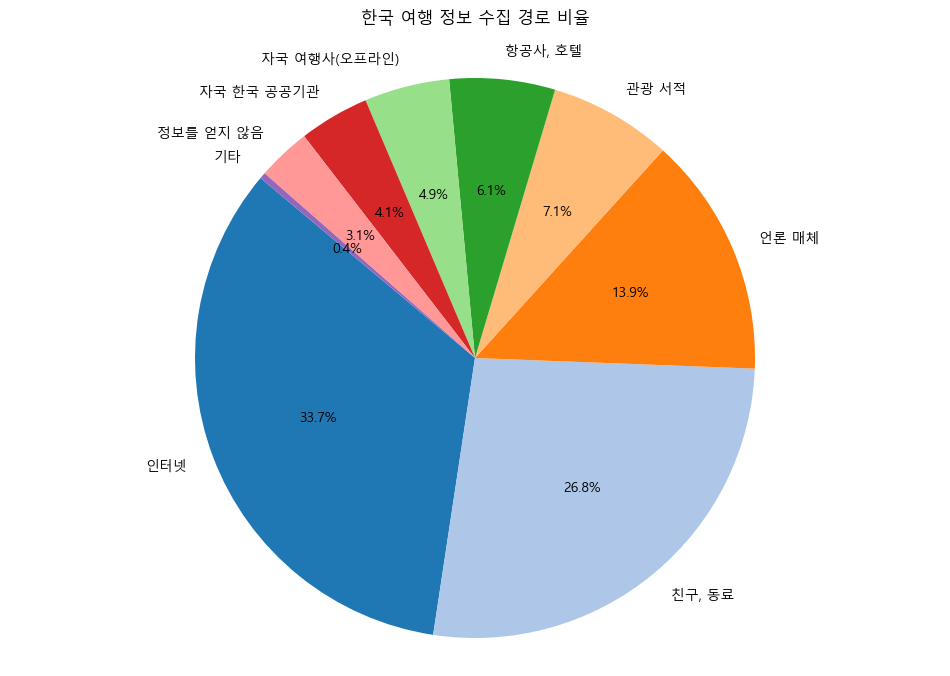

In [41]:
# 모든 데이터를 합친 후 빈도수 계산
all_info_sources = pd.concat([tourist['Q4a1'], tourist['Q4a2'], tourist['Q4a3'], tourist['Q4a_dk']])
info_counts = all_info_sources.value_counts(normalize=True) * 100  # 비율 계산

# 파이차트 그리기
plt.figure(figsize=(12, 8))
plt.pie(
    info_counts,
    labels=info_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.get_cmap('tab20').colors,
    labeldistance=1.1  # 레이블의 위치를 조정
)
plt.title('한국 여행 정보 수집 경로 비율', pad=20)  # 제목과 파이차트 사이의 간격을 조정
plt.axis('equal')  # 파이차트가 원형으로 보이게 설정
plt.show()

In [48]:
# 숫자와 한글 문자열의 매핑
mapping = {
    1: '글로벌 사이트(구글 등)',
    2: '한국 포털사이트(네이버, 다음 등)',
    3: '본인 국가 포털사이트(Yahoo japan, Baidu 등)',
    4: '여행 전문사이트/앱(트립어드바이저, Hotels.com 등)',
    5: 'SNS',
    6: '동영상 사이트(유튜브 등)',
    7: '여행 관련 블로그',
    8: '여행사 홈페이지',
    9: '개별 관광지 홈페이지',
    10 : '항공사/호텔 홈페이지',
    11: '한국 공공기간 홈페이지(한국관광공사, 대사관 등)',
    12 :'기타'}

# 각 칼럼의 숫자를 한글 문자열로 변환
tourist['Q4_1a1'] = tourist['Q4_1a1'].replace(mapping)
tourist['Q4_1a2'] = tourist['Q4_1a2'].replace(mapping)
tourist['Q4_1a3'] = tourist['Q4_1a3'].replace(mapping)

tourist.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6.0,4.0,4.0,5.0,1,"여가, 위락, 휴식",쇼핑,자연경관감상,역사관광,4.0,...,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.10
1,7.0,20.0,4.0,5.0,1,"친구, 친지 방문",쇼핑,지역 축제 참여,K-POP 문화 관광,NaN,...,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.33
2,8.0,2.0,2.0,5.0,1,기타,NaN,NaN,NaN,NaN,...,5,1.0,1.0,4.0,2.0,1.0,5.0,2.0,1.0,244.84
3,10.0,1.0,1.0,NaN,1,사업 또는 전문 활동,NaN,NaN,NaN,NaN,...,4,1.0,1.0,5.0,1.0,5.0,3.0,1.0,1.0,555.27
4,11.0,3.0,3.0,5.0,1,"친구, 친지 방문",공연 관람,자연경관감상,K-POP 문화 관광,NaN,...,5,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,193.43


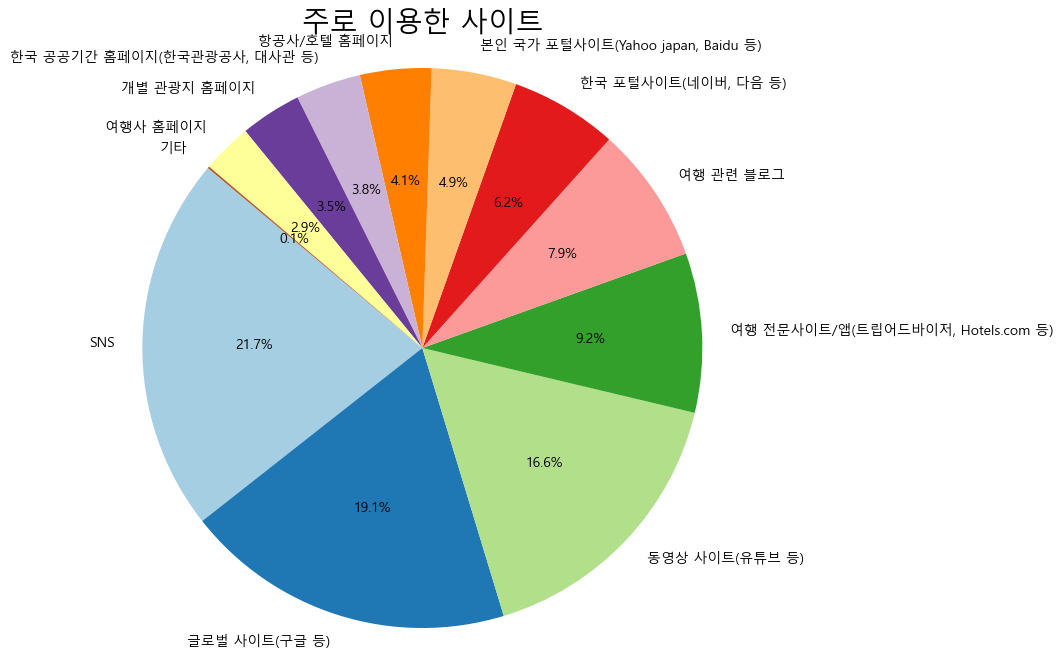

In [57]:
# 각 칼럼의 데이터를 합치기
combined_data = pd.concat([tourist['Q4_1a1'], tourist['Q4_1a2'], tourist['Q4_1a3']], ignore_index=True)

# 데이터 집계
data_counts = combined_data.value_counts()

# 파이 차트 그리기
plt.figure(figsize=(10, 8))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(data_counts))), labeldistance=1.1)
plt.title('주로 이용한 사이트',  fontsize=20)
plt.axis('equal')  # 동그란 파이 차트를 유지하기 위해
plt.show()

In [58]:
# Q4_2a1,Q4_2a2,Q4_2a3,Q4_2a_dk 부족한 정보

# 숫자와 한글 문자열의 매핑
mapping = {
    1: '방문지 정보)',
    2: '교통정보',
    3: '음식 및 맛집 정보',
    4: '쇼핑 정보',
    5: '숙박 정보',
    6: '지역 축제/행사 정보',
    7: '한류 문화 체험 정보(K-POP 공연, 촬영지 등)',
    8: '금융 정보(ATM, 환전소 등)',
    9: '통신 이용정보(무료 wifi, 통신 요금제 등)',
    10 : '기타',
    11: '없음'}

# 각 칼럼의 숫자를 한글 문자열로 변환
tourist['Q4_2a1'] = tourist['Q4_2a1'].replace(mapping)
tourist['Q4_2a2'] = tourist['Q4_2a2'].replace(mapping)
tourist['Q4_2a3'] = tourist['Q4_2a3'].replace(mapping)
tourist['Q4_2a_dk'] = tourist['Q4_2a_dk'].replace(mapping)

tourist.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6.0,4.0,4.0,5.0,1,"여가, 위락, 휴식",쇼핑,자연경관감상,역사관광,4.0,...,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.10
1,7.0,20.0,4.0,5.0,1,"친구, 친지 방문",쇼핑,지역 축제 참여,K-POP 문화 관광,NaN,...,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.33
2,8.0,2.0,2.0,5.0,1,기타,NaN,NaN,NaN,NaN,...,5,1.0,1.0,4.0,2.0,1.0,5.0,2.0,1.0,244.84
3,10.0,1.0,1.0,NaN,1,사업 또는 전문 활동,NaN,NaN,NaN,NaN,...,4,1.0,1.0,5.0,1.0,5.0,3.0,1.0,1.0,555.27
4,11.0,3.0,3.0,5.0,1,"친구, 친지 방문",공연 관람,자연경관감상,K-POP 문화 관광,NaN,...,5,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,193.43


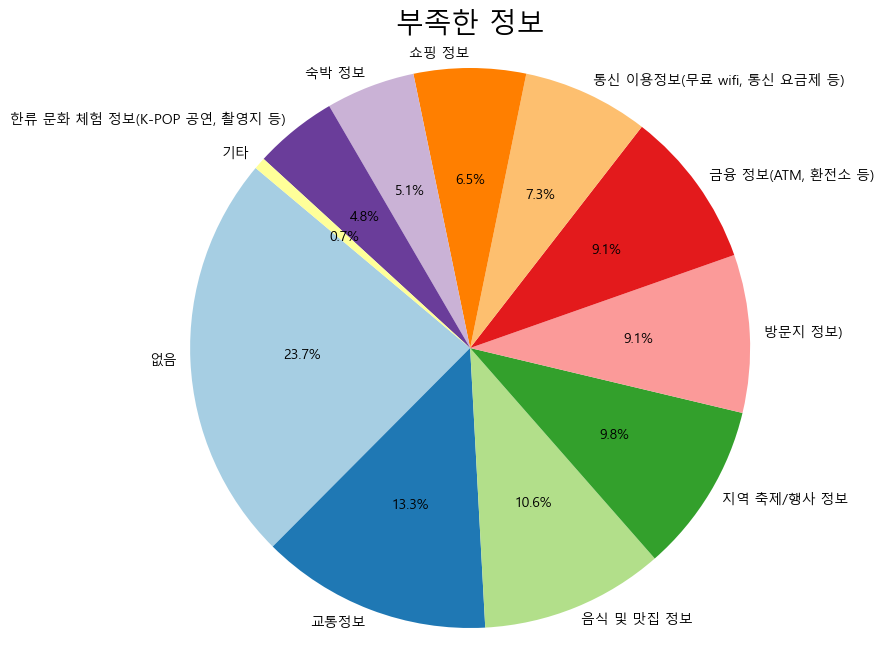

In [61]:
# 각 칼럼의 데이터를 합치기
combined_data = pd.concat([tourist['Q4_2a1'], tourist['Q4_2a2'], tourist['Q4_2a3'],tourist['Q4_2a_dk']], ignore_index=True)

# 데이터 집계
data_counts = combined_data.value_counts()

# 파이 차트 그리기
plt.figure(figsize=(10, 8))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(data_counts))), labeldistance=1.05)
plt.title('부족한 정보',  fontsize=20)
plt.axis('equal')  # 동그란 파이 차트를 유지하기 위해
plt.show()

In [62]:
# Q8_1a1,Q8_1a2,Q8_1a3 만족한 활동

# 숫자와 한글 문자열의 매핑
mapping = {
    1: '식도락 관광',
    2: '쇼핑',
    3: '자연경관감상',
    4: '역사관광',
    5: '전통문화 관광',
    6: '박물관, 전시관 관람',
    7: 'K-POP 문화 관광',
    8: '공연 관람',
    9: '지역 축제 참여',
    10: '유흥',
    11: '놀이공원 및 테마파크 방문',
    12: '뷰티, 미용 관광',
    13: '치료, 건강검진',
    14: '스포츠 관람',
    15: '스포츠 참가',
    16: '국제회의(컨벤션, 전시 등)',
    17 : '비즈니스 활동(업무회의, 산업시설 사찰 등)',
    18 : '연수, 교육, 연구',
    19 : '기타'}

# 각 칼럼의 숫자를 한글 문자열로 변환
tourist['Q8_1a1'] = tourist['Q8_1a1'].replace(mapping)
tourist['Q8_1a2'] = tourist['Q8_1a2'].replace(mapping)
tourist['Q8_1a3'] = tourist['Q8_1a3'].replace(mapping)

tourist.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6.0,4.0,4.0,5.0,1,"여가, 위락, 휴식",쇼핑,자연경관감상,역사관광,4.0,...,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.10
1,7.0,20.0,4.0,5.0,1,"친구, 친지 방문",쇼핑,지역 축제 참여,K-POP 문화 관광,NaN,...,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.33
2,8.0,2.0,2.0,5.0,1,기타,NaN,NaN,NaN,NaN,...,5,1.0,1.0,4.0,2.0,1.0,5.0,2.0,1.0,244.84
3,10.0,1.0,1.0,NaN,1,사업 또는 전문 활동,NaN,NaN,NaN,NaN,...,4,1.0,1.0,5.0,1.0,5.0,3.0,1.0,1.0,555.27
4,11.0,3.0,3.0,5.0,1,"친구, 친지 방문",공연 관람,자연경관감상,K-POP 문화 관광,NaN,...,5,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,193.43


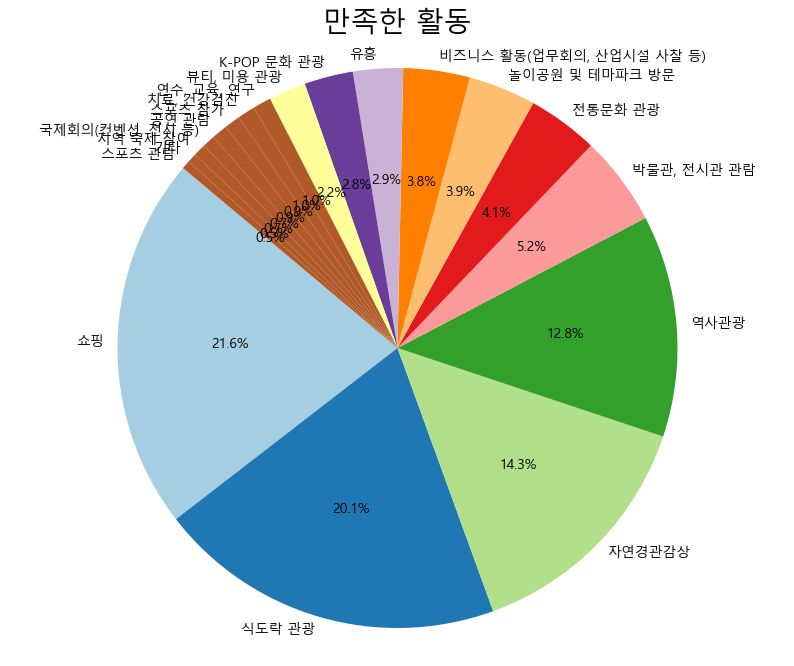

In [63]:
# 각 칼럼의 데이터를 합치기
combined_data = pd.concat([tourist['Q8_1a1'], tourist['Q8_1a2'], tourist['Q8_1a3']], ignore_index=True)

# 데이터 집계
data_counts = combined_data.value_counts()

# 파이 차트 그리기
plt.figure(figsize=(10, 8))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(data_counts))), labeldistance=1.05)
plt.title('만족한 활동',  fontsize=20)
plt.axis('equal')  # 동그란 파이 차트를 유지하기 위해
plt.show()

In [70]:
# Q9_2a01,Q9_2a02,Q9_2a03,Q9_2a04,Q9_2a05,Q9_2a06,Q9_2a07,Q9_2a08,Q9_2a09,Q9_2a10,Q9_2a11,Q9_2a12,Q9_2a13,Q9_2a14,Q9_2a15,Q9_2a16,Q9_2a17 방문 지역

# 숫자와 한글 문자열의 매핑
mapping = {
    1: '서울',
    2: '경기',
    3: '인천',
    4: '강원',
    5: '대전',
    6: '충북',
    7: '충남',
    8: '세종',
    9: '경북',
    10: '경남',
    11: '대구',
    12: '울산',
    13: '부산',
    14: '광주',
    15: '전북',
    16: '전남',
    17 : '제주'}

# 각 칼럼의 숫자를 한글 문자열로 변환
tourist['Q9_2a01'] = tourist['Q9_2a01'].replace(mapping)
tourist['Q9_2a02'] = tourist['Q9_2a02'].replace(mapping)
tourist['Q9_2a03'] = tourist['Q9_2a03'].replace(mapping)
tourist['Q9_2a04'] = tourist['Q9_2a04'].replace(mapping)
tourist['Q9_2a05'] = tourist['Q9_2a05'].replace(mapping)
tourist['Q9_2a06'] = tourist['Q9_2a06'].replace(mapping)
tourist['Q9_2a07'] = tourist['Q9_2a07'].replace(mapping)
tourist['Q9_2a08'] = tourist['Q9_2a08'].replace(mapping)
tourist['Q9_2a09'] = tourist['Q9_2a09'].replace(mapping)
tourist['Q9_2a10'] = tourist['Q9_2a10'].replace(mapping)
tourist['Q9_2a11'] = tourist['Q9_2a11'].replace(mapping)
tourist['Q9_2a12'] = tourist['Q9_2a12'].replace(mapping)
tourist['Q9_2a13'] = tourist['Q9_2a13'].replace(mapping)
tourist['Q9_2a14'] = tourist['Q9_2a14'].replace(mapping)
tourist['Q9_2a15'] = tourist['Q9_2a15'].replace(mapping)
tourist['Q9_2a16'] = tourist['Q9_2a16'].replace(mapping)
tourist['Q9_2a17'] = tourist['Q9_2a17'].replace(mapping)

tourist.head()

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,Q14,D_MON,D_BUN,D_NAT,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight
0,6.0,4.0,4.0,5.0,1,"여가, 위락, 휴식",쇼핑,자연경관감상,역사관광,4.0,...,5,1.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,866.10
1,7.0,20.0,4.0,5.0,1,"친구, 친지 방문",쇼핑,지역 축제 참여,K-POP 문화 관광,NaN,...,5,1.0,1.0,1.0,1.0,3.0,2.0,4.0,1.0,191.33
2,8.0,2.0,2.0,5.0,1,기타,NaN,NaN,NaN,NaN,...,5,1.0,1.0,4.0,2.0,1.0,5.0,2.0,1.0,244.84
3,10.0,1.0,1.0,NaN,1,사업 또는 전문 활동,NaN,NaN,NaN,NaN,...,4,1.0,1.0,5.0,1.0,5.0,3.0,1.0,1.0,555.27
4,11.0,3.0,3.0,5.0,1,"친구, 친지 방문",공연 관람,자연경관감상,K-POP 문화 관광,NaN,...,5,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,193.43


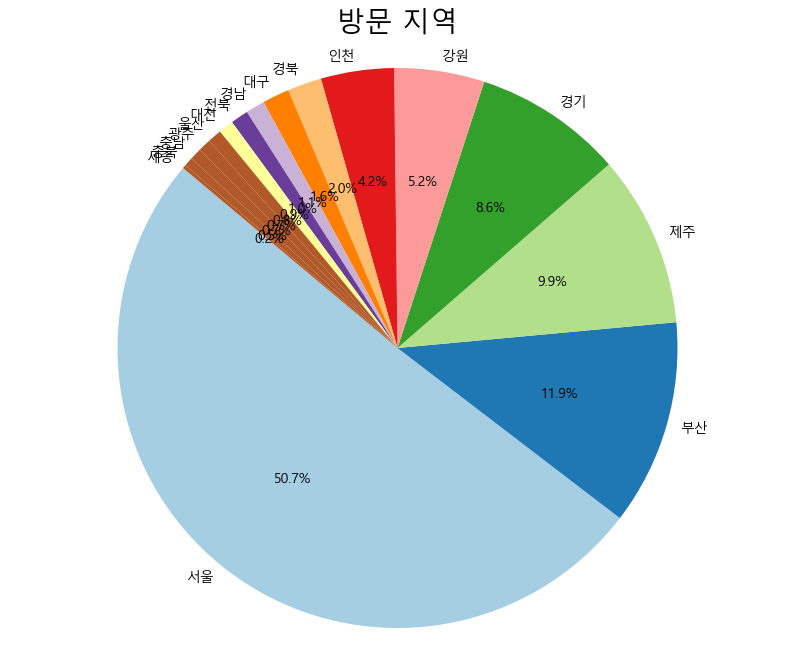

In [71]:
# 각 칼럼의 데이터를 합치기
combined_data = pd.concat([tourist['Q9_2a01'], tourist['Q9_2a02'],tourist['Q9_2a03'],tourist['Q9_2a04'],tourist['Q9_2a05'],tourist['Q9_2a06'],tourist['Q9_2a07'],
                           tourist['Q9_2a08'],tourist['Q9_2a09'],tourist['Q9_2a10'],tourist['Q9_2a11'],tourist['Q9_2a12'],
                           tourist['Q9_2a13'],tourist['Q9_2a14'],tourist['Q9_2a15'],tourist['Q9_2a16'],tourist['Q9_2a17']], ignore_index=True)

# 데이터 집계
data_counts = combined_data.value_counts()

# 파이 차트 그리기
plt.figure(figsize=(10, 8))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(data_counts))), labeldistance=1.05)
plt.title('방문 지역',  fontsize=20)
plt.axis('equal')  # 동그란 파이 차트를 유지하기 위해
plt.show()

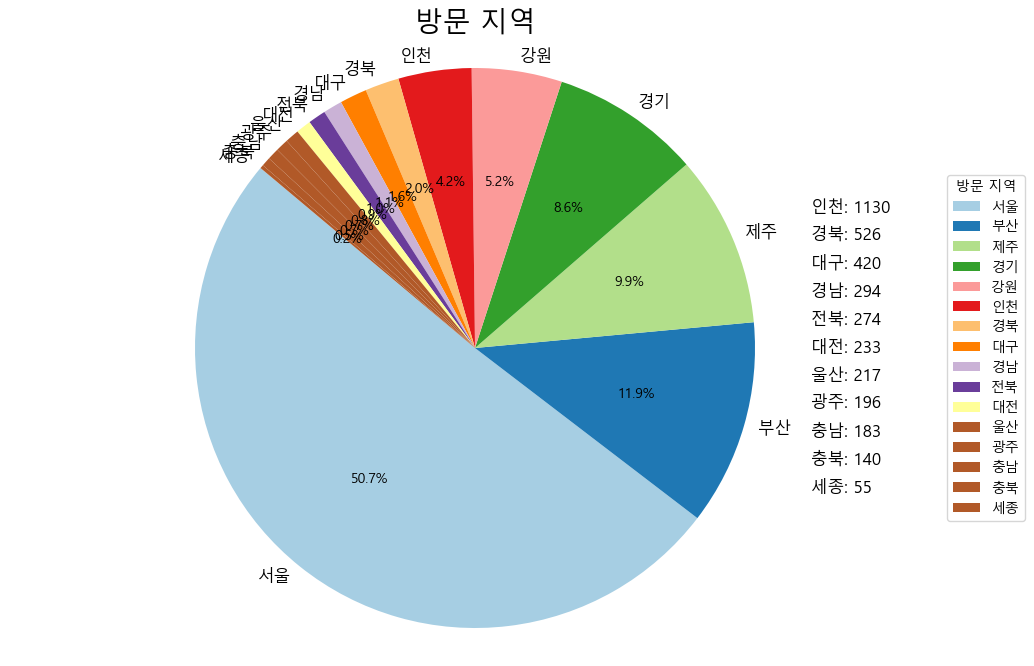

In [76]:
# 각 칼럼의 데이터를 합치기
combined_data = pd.concat([tourist['Q9_2a01'], tourist['Q9_2a02'], tourist['Q9_2a03'], tourist['Q9_2a04'], tourist['Q9_2a05'],
                           tourist['Q9_2a06'], tourist['Q9_2a07'], tourist['Q9_2a08'], tourist['Q9_2a09'], tourist['Q9_2a10'],
                           tourist['Q9_2a11'], tourist['Q9_2a12'], tourist['Q9_2a13'], tourist['Q9_2a14'], tourist['Q9_2a15'],
                           tourist['Q9_2a16'], tourist['Q9_2a17']], ignore_index=True)

# 데이터 집계
data_counts = combined_data.value_counts()

# 파이 차트 그리기
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140,
                                   colors=plt.cm.Paired(range(len(data_counts))), labeldistance=1.05)

# 레이블 추가 (텍스트)
for i, text in enumerate(texts):
    text.set_fontsize(12)
    text.set_color('black')

# 비율이 적은 항목의 레이블을 차트 밖에 추가
for i, autotext in enumerate(autotexts):
    if float(autotext.get_text().strip('%')) < 5:  # 비율이 5% 미만인 항목의 레이블 추가
        plt.text(1.2, 1 - i * 0.1, f'{data_counts.index[i]}: {data_counts.values[i]}', 
                 horizontalalignment='left', verticalalignment='center', fontsize=12)

# 제목 추가
plt.title('방문 지역', fontsize=20)

# 레전드 추가
plt.legend(wedges, data_counts.index, title="방문 지역", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')  # 동그란 파이 차트를 유지하기 위해
plt.show()

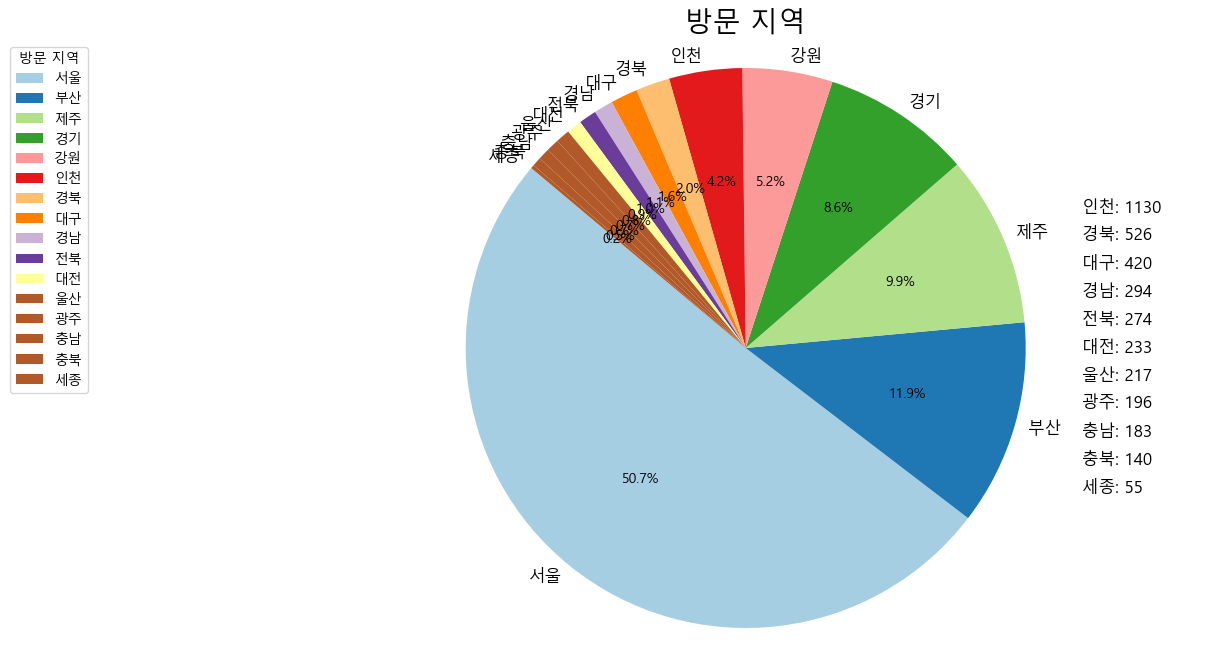

In [78]:
# 각 칼럼의 데이터를 합치기
combined_data = pd.concat([tourist['Q9_2a01'], tourist['Q9_2a02'], tourist['Q9_2a03'], tourist['Q9_2a04'], tourist['Q9_2a05'],
                           tourist['Q9_2a06'], tourist['Q9_2a07'], tourist['Q9_2a08'], tourist['Q9_2a09'], tourist['Q9_2a10'],
                           tourist['Q9_2a11'], tourist['Q9_2a12'], tourist['Q9_2a13'], tourist['Q9_2a14'], tourist['Q9_2a15'],
                           tourist['Q9_2a16'], tourist['Q9_2a17']], ignore_index=True)

# 데이터 집계
data_counts = combined_data.value_counts()

# 파이 차트 그리기
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140,
                                   colors=plt.cm.Paired(range(len(data_counts))), labeldistance=1.05)

# 레이블 추가 (텍스트)
for i, text in enumerate(texts):
    text.set_fontsize(12)
    text.set_color('black')

# 비율이 적은 항목의 레이블을 차트 밖에 추가
for i, autotext in enumerate(autotexts):
    if float(autotext.get_text().strip('%')) < 5:  # 비율이 5% 미만인 항목의 레이블 추가
        plt.text(1.2, 1 - i * 0.1, f'{data_counts.index[i]}: {data_counts.values[i]}', 
                 horizontalalignment='left', verticalalignment='center', fontsize=12)

# 제목 추가
plt.title('방문 지역', fontsize=20)

# 레전드 추가 (왼쪽으로 이동)
plt.legend(wedges, data_counts.index, title="방문 지역", loc="upper right", bbox_to_anchor=(-0.2, 1))

plt.axis('equal')  # 동그란 파이 차트를 유지하기 위해
plt.show()
